Found 20 DICOM files
Volume shape: (128, 128, 20)


c:\Users\asp61\AppData\Local\Programs\Python\Python313\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


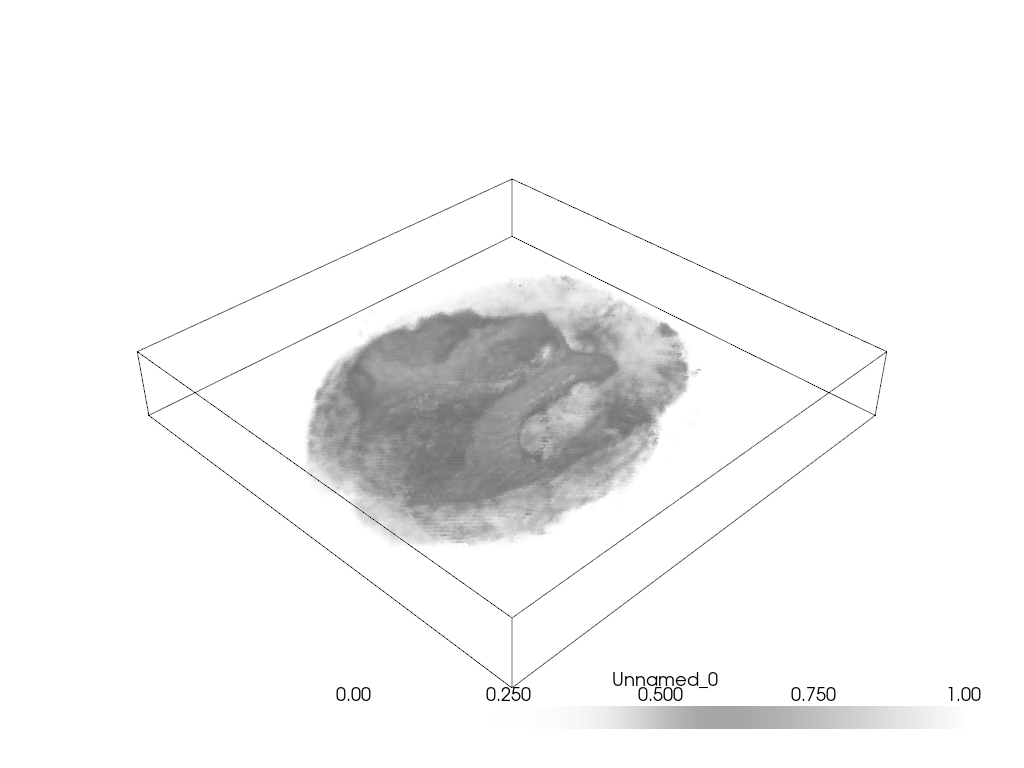

In [1]:
import os
import pydicom
import numpy as np
import pyvista as pv
import vtk
from vtk.util import numpy_support
%gui qt

# Path to the folder containing DICOM slices
dicom_folder = r"UPENN-GBM\UPENN-GBM-00002\11-13-2001-NA-BRAINROUTINE-05064\11.000000-ep2dperf 3cc pre 12bolus-82091"

# List and sort DICOM files
dicom_files = sorted([f for f in os.listdir(dicom_folder) if f.endswith('.dcm') and f.startswith('02')])
print(f"Found {len(dicom_files)} DICOM files")

# Read DICOM slices and stack them into a 3D volume
dicom_data = [pydicom.dcmread(os.path.join(dicom_folder, f)) for f in dicom_files]
volume = np.stack([dcm.pixel_array for dcm in dicom_data], axis=-1).astype(np.float32)

# Normalize pixel values (scale between 0 and 1)
volume = (volume - volume.min()) / (volume.max() - volume.min())

# Print the volume shape to ensure it's 3D
print("Volume shape:", volume.shape)

# Create a vtkImageData object
imageData = vtk.vtkImageData()
nx, ny, nz = volume.shape  # Number of voxels along each axis
imageData.SetDimensions(nx, ny, nz)
imageData.SetSpacing(1, 1, 1)  # Change if you have real voxel spacing

# Convert the NumPy array to a VTK array (flattened in Fortran order)
vtk_array = numpy_support.numpy_to_vtk(
    volume.flatten(order='F'),
    deep=True,
    array_type=vtk.VTK_FLOAT
)
imageData.GetPointData().SetScalars(vtk_array)

# Wrap the vtkImageData in a PyVista object
grid = pv.wrap(imageData)

# Create the PyVista plotter and add an outline to visualize the volume bounds
p = pv.Plotter()
p.add_mesh(grid.outline(), color="black")
p.add_volume(grid, opacity="sigmoid", cmap="gray")

# Show the interactive window
p.show()
